# HEALPix cell size analysis

This notebook tries to evaluate the size of a pixel on the authalic cell. The basis hypotesis is that the sphere is of Radius 6374581.4671 (https://raichev.net/files/rhealpix_dggs_preprint.pdf)

Thie notebooks will try to evaluate for several configuration of HEALPix (playing with N_{\phi} and N_{\theta})


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

## Available parameters

In [ ]:
N_phi = 4
N_theta = 3
N_side = np.linspace(0, 20, 21)

R_earth_authalic = 6374581.4671
surface_authalic = 4.0 * np.pi * R_earth_authalic**2

In [ ]:
N_phi = 4
N_theta = 3
N_side = np.linspace(0, 20, 21)

In [3]:
def compute_pixel_area(surface_area = surface_authalic, N_phi = N_phi, N_theta = N_theta, N_side = N_side):
    """
    For each value in the N_side array, compute the pixel size.
    """
    return surface_area / (N_phi * N_theta * (2.0**N_side)**2)

print(2**N_side)
result = compute_pixel_area(surface_area = surface_authalic, N_phi = N_phi, N_theta = N_theta, N_side = N_side)
print((result))

[1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
 3.200000e+01 6.400000e+01 1.280000e+02 2.560000e+02 5.120000e+02
 1.024000e+03 2.048000e+03 4.096000e+03 8.192000e+03 1.638400e+04
 3.276800e+04 6.553600e+04 1.310720e+05 2.621440e+05 5.242880e+05
 1.048576e+06]
[4.25531750e+13 1.06382938e+13 2.65957344e+12 6.64893360e+11
 1.66223340e+11 4.15558350e+10 1.03889587e+10 2.59723969e+09
 6.49309921e+08 1.62327480e+08 4.05818701e+07 1.01454675e+07
 2.53636688e+06 6.34091720e+05 1.58522930e+05 3.96307325e+04
 9.90768313e+03 2.47692078e+03 6.19230195e+02 1.54807549e+02
 3.87018872e+01]


In [4]:
import pandas as pd

# Create a DataFrame with N_side and result values
df_result = pd.DataFrame({
    'N_side': 2**N_side,
    'Pixel Area': result
})

print(df_result)

       N_side    Pixel Area
0         1.0  4.255318e+13
1         2.0  1.063829e+13
2         4.0  2.659573e+12
3         8.0  6.648934e+11
4        16.0  1.662233e+11
5        32.0  4.155583e+10
6        64.0  1.038896e+10
7       128.0  2.597240e+09
8       256.0  6.493099e+08
9       512.0  1.623275e+08
10     1024.0  4.058187e+07
11     2048.0  1.014547e+07
12     4096.0  2.536367e+06
13     8192.0  6.340917e+05
14    16384.0  1.585229e+05
15    32768.0  3.963073e+04
16    65536.0  9.907683e+03
17   131072.0  2.476921e+03
18   262144.0  6.192302e+02
19   524288.0  1.548075e+02
20  1048576.0  3.870189e+01


In [5]:
df_result['Pixel Size (m)'] = np.sqrt(df_result['Pixel Area'])
print(df_result)

       N_side    Pixel Area  Pixel Size (m)
0         1.0  4.255318e+13    6.523279e+06
1         2.0  1.063829e+13    3.261640e+06
2         4.0  2.659573e+12    1.630820e+06
3         8.0  6.648934e+11    8.154099e+05
4        16.0  1.662233e+11    4.077050e+05
5        32.0  4.155583e+10    2.038525e+05
6        64.0  1.038896e+10    1.019262e+05
7       128.0  2.597240e+09    5.096312e+04
8       256.0  6.493099e+08    2.548156e+04
9       512.0  1.623275e+08    1.274078e+04
10     1024.0  4.058187e+07    6.370390e+03
11     2048.0  1.014547e+07    3.185195e+03
12     4096.0  2.536367e+06    1.592598e+03
13     8192.0  6.340917e+05    7.962988e+02
14    16384.0  1.585229e+05    3.981494e+02
15    32768.0  3.963073e+04    1.990747e+02
16    65536.0  9.907683e+03    9.953735e+01
17   131072.0  2.476921e+03    4.976867e+01
18   262144.0  6.192302e+02    2.488434e+01
19   524288.0  1.548075e+02    1.244217e+01
20  1048576.0  3.870189e+01    6.221084e+00


In [6]:
def generalized_healpix_pixel_area(level, n_phi=4, n_theta=3, radius_m=R_earth_authalic):
    """
    Area of a pixel in a generalized equal-area iso-latitude HEALPix-like grid.

    Parameters
    ----------
    level : int or array-like
        Hierarchical order L (at each step every pixel splits into 4).
    n_phi : int, optional
        Longitudinal divisions in the base (level-0) equatorial ring.
        Classical HEALPix uses n_phi = 4.
    n_theta : int, optional
        Number of iso-latitude rings in level-0 (counts both polar caps
        and the equatorial ring).  Classical HEALPix uses n_theta = 3.
    radius_m : float, optional
        Sphere radius in metres.

    Returns
    -------
    area_m2 : float or ndarray
        Surface area of **one** pixel at the requested level, in m².
    """
    level   = np.asarray(level)
    n_base  = n_phi * n_theta             # total base pixels
    n_pix   = n_base * 4**level           # total pixels at this level
    area_sr = 4.0 * np.pi / n_pix             # pixel solid angle in steradians
    return (radius_m**2) * area_sr       # convert to m²

In [7]:
Ls       = N_side # HEALPix levels
variants = [(3, 2),          # 6-pixel
            (4, 2),          # 8-pixel
            (3, 3),          # 9-pixel
            (4, 3),          # 12-pixel classic grid
            (4, 4),          # 16-pixel
            (5, 4)]          # 16-pixel

df_result = pd.DataFrame({
    'N_side': 2**N_side
})

for nphi, ntheta in variants:
    df_result[f'({ntheta},{nphi})'] = generalized_healpix_pixel_area(Ls, nphi, ntheta)

print(df_result)

       N_side         (2,3)         (2,4)         (3,3)         (3,4)  \
0         1.0  8.510635e+13  6.382976e+13  5.673757e+13  4.255318e+13   
1         2.0  2.127659e+13  1.595744e+13  1.418439e+13  1.063829e+13   
2         4.0  5.319147e+12  3.989360e+12  3.546098e+12  2.659573e+12   
3         8.0  1.329787e+12  9.973400e+11  8.865245e+11  6.648934e+11   
4        16.0  3.324467e+11  2.493350e+11  2.216311e+11  1.662233e+11   
5        32.0  8.311167e+10  6.233375e+10  5.540778e+10  4.155583e+10   
6        64.0  2.077792e+10  1.558344e+10  1.385194e+10  1.038896e+10   
7       128.0  5.194479e+09  3.895860e+09  3.462986e+09  2.597240e+09   
8       256.0  1.298620e+09  9.739649e+08  8.657466e+08  6.493099e+08   
9       512.0  3.246550e+08  2.434912e+08  2.164366e+08  1.623275e+08   
10     1024.0  8.116374e+07  6.087281e+07  5.410916e+07  4.058187e+07   
11     2048.0  2.029094e+07  1.521820e+07  1.352729e+07  1.014547e+07   
12     4096.0  5.072734e+06  3.804550e+06  3.381823

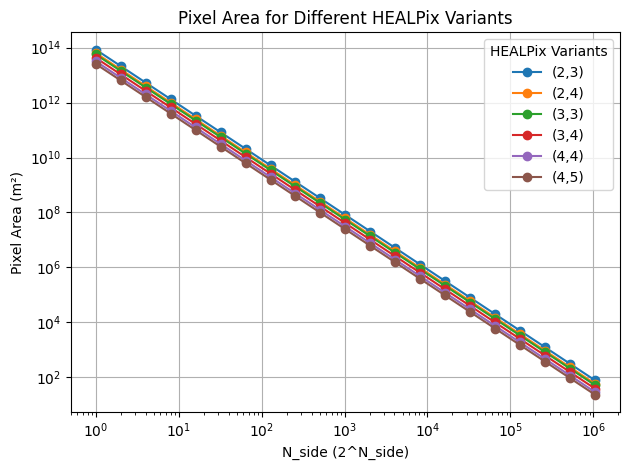

In [8]:
df_result.plot(x='N_side', y=df_result.columns[1:], marker='o')
plt.xlabel('N_side (2^N_side)')
plt.ylabel('Pixel Area (m²)')
plt.title('Pixel Area for Different HEALPix Variants')
plt.grid()
plt.legend(title='HEALPix Variants')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [9]:
for nphi, ntheta in variants:
    print(f"\nBase grid: n_phi={nphi}, n_theta={ntheta} "
            f"→ base pixels = {nphi*ntheta}")
    for L in Ls:
        a = generalized_healpix_pixel_area(L, nphi, ntheta)
        print(f"  L={L:10.0f} - {2**L:10.0f}: {a:17.2f} m² -  {np.sqrt(a):10.2f} m² ")


Base grid: n_phi=3, n_theta=2 → base pixels = 6
  L=         0 -          1: 85106350016059.83 m² -  9225310.29 m² 
  L=         1 -          2: 21276587504014.96 m² -  4612655.15 m² 
  L=         2 -          4:  5319146876003.74 m² -  2306327.57 m² 
  L=         3 -          8:  1329786719000.93 m² -  1153163.79 m² 
  L=         4 -         16:   332446679750.23 m² -   576581.89 m² 
  L=         5 -         32:    83111669937.56 m² -   288290.95 m² 
  L=         6 -         64:    20777917484.39 m² -   144145.47 m² 
  L=         7 -        128:     5194479371.10 m² -    72072.74 m² 
  L=         8 -        256:     1298619842.77 m² -    36036.37 m² 
  L=         9 -        512:      324654960.69 m² -    18018.18 m² 
  L=        10 -       1024:       81163740.17 m² -     9009.09 m² 
  L=        11 -       2048:       20290935.04 m² -     4504.55 m² 
  L=        12 -       4096:        5072733.76 m² -     2252.27 m² 
  L=        13 -       8192:        1268183.44 m² -     1126.14 m² 

In [10]:
print(f"\nBase grid: n_phi={4}, n_theta={3} "
            f"→ base pixels = {12}")
print(f"  Level - Nside: Pixel surface-  Pixel side length m - Number of pixels in 110km² (S2 tiles)")
for L in Ls:
       a = generalized_healpix_pixel_area(L, 4, 3)
       print(f"  L={L:10.0f} - {2**L:10.0f}: {a:17.2f} m² -  {np.sqrt(a):10.2f} m - {(110000/np.sqrt(a))**2:10.2f} ")


Base grid: n_phi=4, n_theta=3 → base pixels = 12
  Level - Nside: Pixel surface-  Pixel side length m - Number of pixels in 110km² (S2 tiles)
  L=         0 -          1: 42553175008029.91 m² -  6523279.47 m -       0.00 
  L=         1 -          2: 10638293752007.48 m² -  3261639.73 m -       0.00 
  L=         2 -          4:  2659573438001.87 m² -  1630819.87 m -       0.00 
  L=         3 -          8:   664893359500.47 m² -   815409.93 m -       0.02 
  L=         4 -         16:   166223339875.12 m² -   407704.97 m -       0.07 
  L=         5 -         32:    41555834968.78 m² -   203852.48 m -       0.29 
  L=         6 -         64:    10388958742.19 m² -   101926.24 m -       1.16 
  L=         7 -        128:     2597239685.55 m² -    50963.12 m -       4.66 
  L=         8 -        256:      649309921.39 m² -    25481.56 m -      18.64 
  L=         9 -        512:      162327480.35 m² -    12740.78 m -      74.54 
  L=        10 -       1024:       40581870.09 m² -     6